In [1]:
import wellmap
import pandas as pd
import os
import string
import seaborn as sns

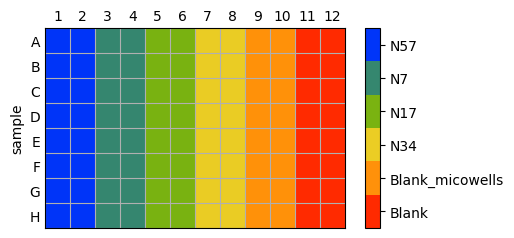

In [5]:
# wellmap.show("2 substance 1 plate.toml")
wellmap.show("sph_dif_number.toml"); # Yes, this semicolon is meaningful. Or plates map will be duplicated

In [7]:
path_to_data_0h = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\27-06-2024 Resazurin hTERT Sph dif N\0H_Wells_plate.csv"
path_to_data_24h = r"C:\Users\Modern\Documents\Biorad\CellProfiler\Results\27-06-2024 Resazurin hTERT Sph dif N\24HWells_plate.csv"

data_raw_0h = pd.read_csv(path_to_data_0h) 
data_raw_24h = pd.read_csv(path_to_data_24h) 

# print(data_raw.columns)
# print(data)


In [8]:
data_0H = data_raw_0h[['Intensity_MeanIntensity_OrigGreen','Intensity_MeanIntensity_OrigRed']].copy()
data_24H = data_raw_24h[['Intensity_MeanIntensity_OrigGreen','Intensity_MeanIntensity_OrigRed']].copy()



In [153]:
row_column_df = pd.DataFrame(columns=['row','col'])

row =  list(string.ascii_uppercase[0:8])
column = list(range(1,13))

row_column_list = []

for c in column:
    for r in row:
        array_i = [r,c]
        row_column_list.append(array_i)


# print(row_column_list)


row_column_df = pd.DataFrame(row_column_list, columns = ['row', 'col']) 

print(row_column_df)

row    object
col     int64
dtype: object


In [155]:

data_indexed = pd.concat([row_column_df, data], axis=1, join='inner')


data_indexed['col']=data_indexed['col'].astype(str)
print(data_indexed.dtypes)

row                                   object
col                                   object
Intensity_MeanIntensity_OrigGreen    float64
Intensity_MeanIntensity_OrigRed      float64
dtype: object


In [159]:
labels = wellmap.load('sph_dif_number.toml')
# print(labels.dtypes)
# print(data_indexed.dtypes)


data_plate = pd.merge(data_indexed, labels)
print(data_plate)

   row col  Intensity_MeanIntensity_OrigGreen  \
0    A   1                           0.050275   
1    B   1                           0.060515   
2    C   1                           0.069410   
3    D   1                           0.055732   
4    E   1                           0.056197   
..  ..  ..                                ...   
91   D  12                           0.021266   
92   E  12                           0.021385   
93   F  12                           0.022824   
94   G  12                           0.022357   
95   H  12                           0.019518   

    Intensity_MeanIntensity_OrigRed well well0  row_i  col_j sample  
0                          0.175962   A1   A01      0      0    N57  
1                          0.208404   B1   B01      1      0    N57  
2                          0.225460   C1   C01      2      0    N57  
3                          0.230673   D1   D01      3      0    N57  
4                          0.239340   E1   E01      4      0 

C:\Users\Modern\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sample', ylabel='Intensity_MeanIntensity_OrigGreen'>

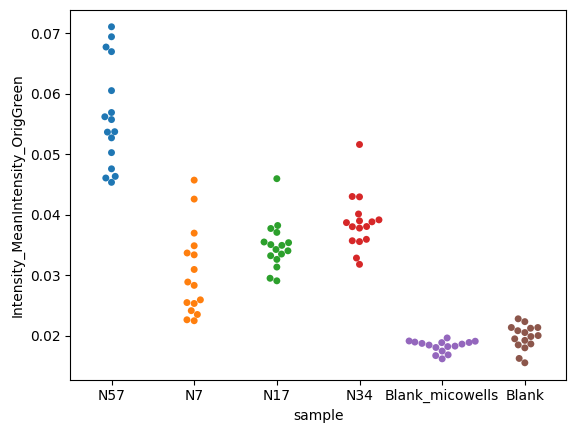

In [166]:
sns.swarmplot(data=data_plate, x="sample", y="Intensity_MeanIntensity_OrigGreen")